### Описание работы:
В рамках настоящей домашней работы я попытаюсь обучить модель на "сентимент" датасете, в котором размечены депрессия, тревожность и другие заболевания исходя из сообщений, которые люди запостили в твиттере

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [4]:
df = pd.read_csv("Combined Data.csv")
df = df[['statement','status']].copy()

### Анализ данных датасета

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 828.9+ KB


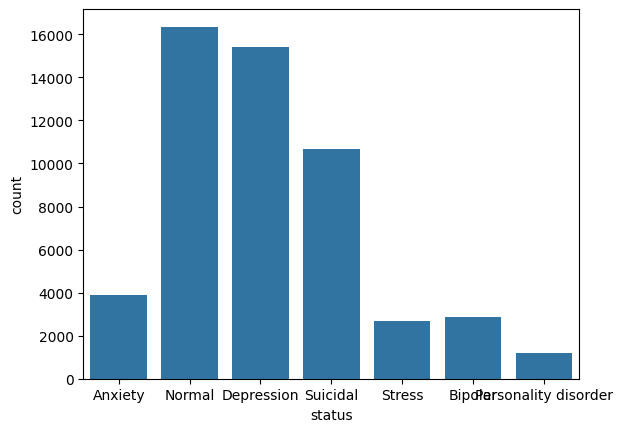

In [5]:
df.info()

sns.countplot(x='status', data=df)
plt.show()


Поскольку разброс между количеством классов большой я буду рассматривать только депрессию и норму.

In [6]:
# Удаляем заболевания
df_depr_norm = df[df['status'].isin(['Depression', 'Normal'])].reset_index(drop=True)

In [7]:
df_depr_norm['statement'] = df_depr_norm['statement'].astype(str)
texts = df_depr_norm['statement'].tolist()  # Преобразуем колонку DataFrame в список строк

# Создаем токенизатор и обучаем на текстах
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

padded_sequences = pad_sequences(sequences, padding='post')  



In [8]:
df_depr_norm

,statement,status
0,"Gr gr dreaming of ex crush to be my game, God",Normal
1,wkwkwk what a joke,Normal
2,Leaves are also standby in front of the PC ......,Normal
3,Thank God even though it's just a ride through,Normal
4,wedding teaser concept using the song day6 - o...,Normal
...,...,...
31750,"solutions So, when I have my real bad downs th...",Depression
31751,I’m pretty sure I’m depressed.. Ive been feeli...,Depression
31752,I can’t be bothered anymore. I’m a 22 year old...,Depression
31753,Depression feels like you’re drowning and ther...,Depression


In [9]:
data = pd.DataFrame()
data['statements'] = list(padded_sequences)  # Преобразуем массив в список для сохранения в DataFrame
data['status'] = df_depr_norm['status']

In [10]:
# Приводим категориальные данные в числовые
status = LabelEncoder().fit_transform(df_depr_norm['status'])
# 1 - Normal, 0 - Depression

In [11]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, status, test_size=0.2, shuffle=False)
print(type(X_train))  # Должно быть numpy.ndarray
print(X_train.shape)  # Должна быть форма (n_samples, max_length)
print(type(y_train))  # Должно быть numpy.ndarray
print(y_train.shape)  # Должна быть форма (n_samples, max_length)

<class 'numpy.ndarray'>
(25404, 4239)
<class 'numpy.ndarray'>
(25404,)


In [ ]:

# Настройка модели для обработки текста
vocab_size = len(tokenizer.word_index) + 1  # Размер словаря
embedding_dim = 100  # Размерность эмбеддингов
max_length = X_train.shape[1]  # Длина паддинга

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Conv1D(filters=256, kernel_size=10, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(2, activation='sigmoid')  # Для многоклассовой классификации
])

# Компиляция и обучение модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5


c:\Users\mrpec\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\mrpec\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


178/794 ━━━━━━━━━━━━━━━━━━━━ 3:29 340ms/step - accuracy: 0.4951 - loss: 0.0000e+00

KeyboardInterrupt: 